***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 3**

***Problem 3.6***


We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data.

In [13]:
datafile = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
datafile

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [14]:
datafile.drop(datafile.index[0], inplace=True) #remove row including information on units
datafile=datafile.astype(float) #convert values to float for easy operation
datafile.index=datafile.index.astype(float) #convert indexees to float for easy operation


We select the AM1.5G spectrum for our calculations

In [15]:
G = datafile['AM1.5G']
G

280.0     4.730000e-23
280.5     1.230000e-21
281.0     5.690000e-21
281.5     1.570000e-19
282.0     1.190000e-18
              ...     
3980.0    7.390000e-03
3985.0    7.430000e-03
3990.0    7.370000e-03
3995.0    7.210000e-03
4000.0    7.100000e-03
Name: AM1.5G, Length: 2002, dtype: float64

<br>
We will store all the calculated data in a dataframe

<br>
First We define the targetted bandgap values

In [48]:
gaps=np.arange(0.2, 2.7, 0.4)
df = pd.DataFrame()
df['gap eV']=np.round(gaps, 2)
df['gap nm']=np.round(1240/np.array(df['gap eV'])) #bandgaps in wavelenght for esay operation
df=df.set_index('gap eV') #set bandgap in eV as index column
df

,gap nm
gap eV,
0.2,6200.0
0.6,2067.0
1.0,1240.0
1.4,886.0
1.8,689.0
2.2,564.0
2.6,477.0


Foe ech bndgap, we calculate the maximum voltage

$V_{max}\approx 0.75\ E_g$ (V)

In [50]:
df['V_max']=np.round(0.75*df.index,1)

We define the adequate constants to calcutale the ideal SR
<br>
and, with, it we calculate the maximum current density $J_{max}$ using Eq. 3.4.

$J_{max}=\int SR_{ideal}(\lambda) \cdot G(\lambda) \ d\lambda$ (A/m2)

In [51]:
h=6.63*10**(-34) # [J·s] Planck constant
e=1.60*10**(-19) #C electron charge
c =299792458 #[m/s] Light speed

idealSR=pd.Series(index=G.index,
                  data=[wl*0.000000001*e/(h*c) for wl in G.index])
def Jmax(wl):
    return np.trapz(G[G.index<wl]*idealSR[idealSR.index<wl]) #A/cm2

df['J_max']=np.round([Jmax(gap) for gap in df['gap nm']],1)

We calculate the approximted maximum power density
and the maximum efficiency

$P_{max} \approx 0.8 \cdot J_{max} \cdot V_{max}$ (W/m2)

$\eta_{max}= {P_{max} \over 1000}$

In [52]:
df['P_max']=np.round(0.8*df['V_max']*df['J_max'],1)
df['eff_max']=np.round(df['P_max']/1000,2)

We visualize the data as a table
plot the approximated maximum efficiency as a fucntion of the bandgap.<br>
The bandgap of silicon is indicated with a dashed line.

        gap nm  V_max  J_max  P_max  eff_max
gap eV                                      
0.2     6200.0    0.2  622.7   99.6     0.10
0.6     2067.0    0.4  609.2  194.9     0.19
1.0     1240.0    0.8  494.4  316.4     0.32
1.4      886.0    1.0  341.3  273.0     0.27
1.8      689.0    1.4  209.1  234.2     0.23
2.2      564.0    1.6  119.1  152.4     0.15
2.6      477.0    2.0   63.3  101.3     0.10


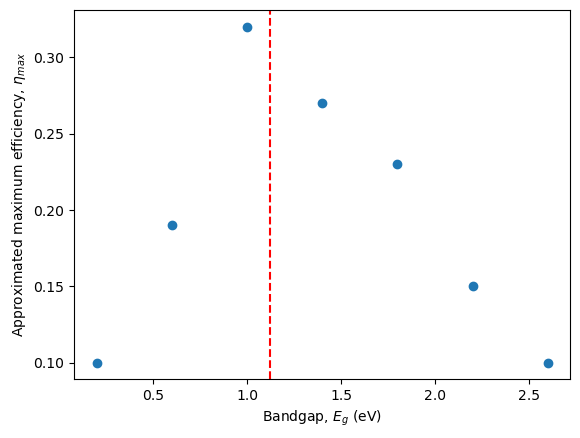

In [55]:
print(df)
plt.plot(df['eff_max'],'o')
plt.ylabel(r'Approximated maximum efficiency, $\eta_{max}$')
plt.xlabel('Bandgap, $E_g$ (eV)')
plt.axvline(1.12, c='red', ls='--')

***Discusion***

Silicon is used in solar cells because its bandgap is optimal
for photovoltivc conversion as the overall transmission and thermalization losses are minimized.